In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import seaborn as sns
from scipy import stats
import datetime
sns.set()

In [2]:
#.csv files from Covid-Data/make_params_for_covid
# NOTE: these files have been changed so there is no 'Unnamed' col, make sure you have the new ones
# if you don't there will be errors!

# NOTE to the NOTE: Adding index = False to the arg fixes this issue

atlCases = pd.read_csv('Covid-Data/atlCases.csv', index_col =0, parse_dates = [6])
jfkCases = pd.read_csv('Covid-Data/jfkCases.csv', index_col =0, parse_dates = [6])
lgaCases = pd.read_csv('Covid-Data/lgaCases.csv', index_col =0, parse_dates = [6])
seaCases = pd.read_csv('Covid-Data/seaCases.csv', index_col =0, parse_dates = [6])
laxCases = pd.read_csv('Covid-Data/laxCases.csv', index_col =0, parse_dates = [6])
yvrCases = pd.read_csv('Covid-Data/yvrCases.csv', index_col =0, parse_dates = [6])
yegCases = pd.read_csv('Covid-Data/yegCases.csv', index_col =0, parse_dates = [6])
yyzCases = pd.read_csv('Covid-Data/yyzCases.csv', index_col =0, parse_dates = [6])
yulCases = pd.read_csv('Covid-Data/yulCases.csv', index_col =0, parse_dates = [6])

In [3]:
def makeTimestamp(x):
    return x.timestamp()

In [5]:
# TODO: Do USA later.

# YVR (Trends in Covid Infections in BC)

In [4]:
#yvrCases = yvrCases.drop(columns = ["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.1.1", "Unnamed: 0.1.1.1"])
yvrCases.loc[0,"Difference"] = 0
yvrCases["timestamp"] = yvrCases["Date"].apply(makeTimestamp)
fit = stats.linregress(yvrCases["timestamp"], yvrCases["Difference"])
yvrCases["Prediction"] = yvrCases["timestamp"] * fit.slope + fit.intercept
fit.slope, fit.intercept

(5.667180601702926e-06, -8981.453237790729)

Month
April         36.633333
August        69.322581
July          23.387097
June          11.433333
March         58.900000
May           14.870968
October      120.647059
September    111.600000
Name: Difference, dtype: float64

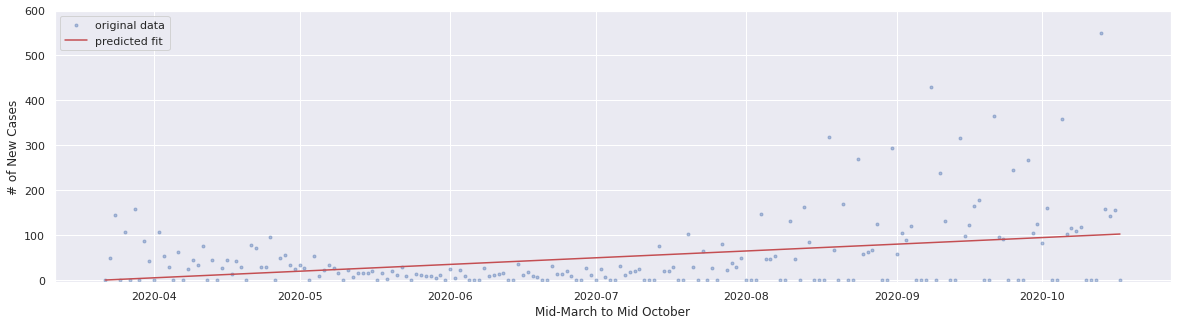

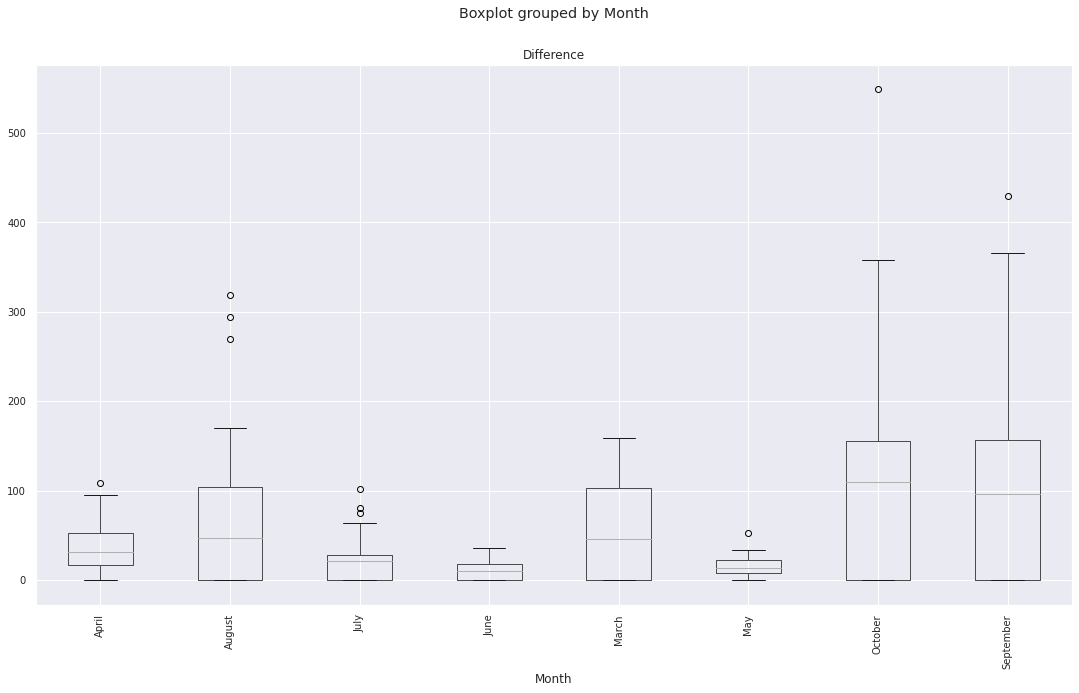

In [5]:
# Plot daily new cases 
plt.figure(figsize = (20,5))
plt.ylim(-5,600)
plt.xlabel("Mid-March to Mid October")
plt.ylabel("# of New Cases")
plt.plot(yvrCases["Date"], yvrCases["Difference"], 'b.', label = 'original data', alpha = 0.4)
plt.plot(yvrCases["Date"], yvrCases["Prediction"], 'r-', label = 'predicted fit')
plt.legend()
#plt.show()

yvrCases["Month"] = yvrCases['Date'].dt.month_name()
yvrCases.boxplot(column = ['Difference'], by = 'Month', rot = 90, fontsize = 10, figsize = (18,10))

yvrCases.groupby(['Month'])["Difference"].mean()
#%store yvrCases
#yvrCases.to_csv('Covid-Data/yvr-modified.csv', mode = 'overwrite')

# YEG

In [6]:
yegCases["Date"] = pd.to_datetime(yegCases["Date"])
#yegCases = yegCases.drop(columns = ["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.1.1", "Unnamed: 0.1.1.1"])
yegCases.loc[0,"Difference"] = 0
yegCases["timestamp"] = yegCases["Date"].apply(makeTimestamp)
fit = stats.linregress(yegCases["timestamp"], yegCases["Difference"])
yegCases["Prediction"] = yegCases["timestamp"] * fit.slope + fit.intercept
fit.slope, fit.intercept

(5.037682170383593e-06, -7926.923111959132)

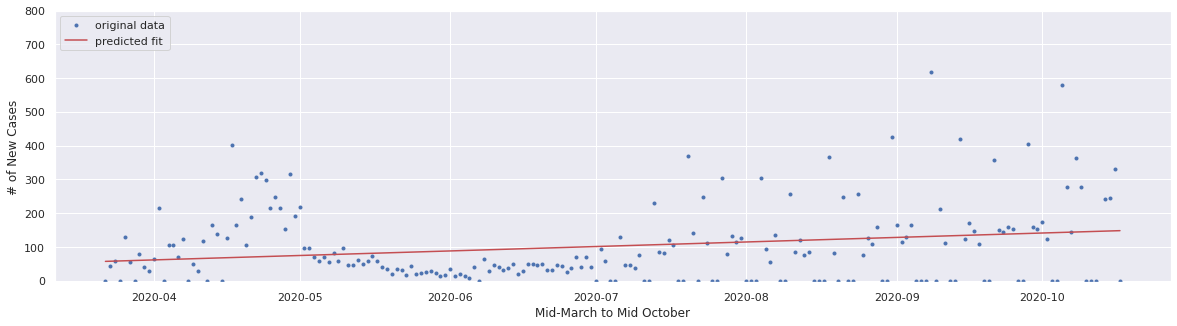

In [7]:
# Plot daily new cases 
plt.figure(figsize = (20,5))
plt.ylim(-5,800)
plt.xlabel("Mid-March to Mid October")
plt.ylabel("# of New Cases")
plt.plot(yegCases["Date"], yegCases["Difference"], 'b.', label = 'original data')
plt.plot(yegCases["Date"], yegCases["Prediction"], 'r-', label = 'predicted fit')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Difference'}, xlabel='Month'>

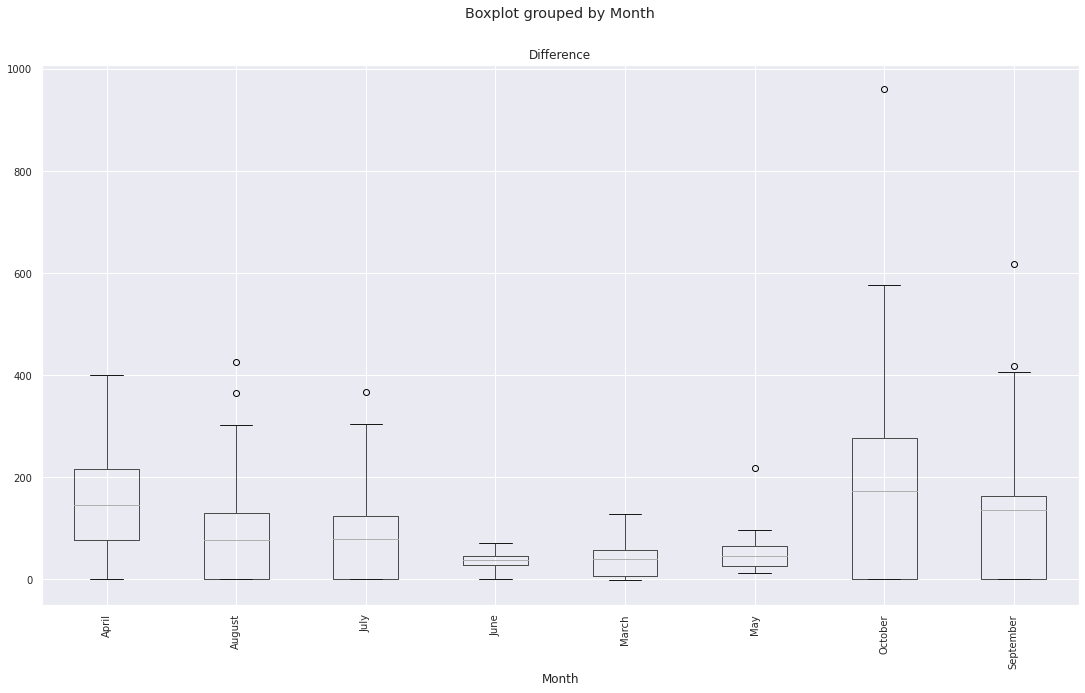

In [8]:
yegCases["Month"] = yegCases['Date'].dt.month_name()
yegCases.boxplot(column = ['Difference'], by = 'Month', rot = 90, fontsize = 10, figsize = (18,10))

In [9]:
yegCases.to_csv('Covid-Data/yeg-modified.csv', index = False)
yegCases

,Active,Case-Fatality_Ratio,Combined_Key,Confirmed,Country/Region,Date,Deaths,Incidence_Rate,Latitude,Longitude,Province/State,Recovered,geometry,Difference,timestamp,Prediction,Month
0,0.0,NaN,"Alberta, Canada",259,Canada,2020-03-22,1,NaN,53.9333,-116.5765,Alberta,0,POINT (-116.5765 53.9333),0.0,1.584835e+09,56.972918,March
1,0.0,NaN,"Alberta, Canada",301,Canada,2020-03-23,1,NaN,53.9333,-116.5765,Alberta,0,POINT (-116.5765 53.9333),42.0,1.584922e+09,57.408174,March
2,0.0,NaN,"Alberta, Canada",359,Canada,2020-03-24,1,NaN,53.9333,-116.5765,Alberta,0,POINT (-116.5765 53.9333),58.0,1.585008e+09,57.843430,March
3,0.0,NaN,"Alberta, Canada",358,Canada,2020-03-25,2,NaN,53.9333,-116.5765,Alberta,0,POINT (-116.5765 53.9333),-1.0,1.585094e+09,58.278685,March
4,0.0,NaN,"Alberta, Canada",486,Canada,2020-03-26,2,NaN,53.9333,-116.5765,Alberta,0,POINT (-116.5765 53.9333),128.0,1.585181e+09,58.713941,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2615.0,1.364764,"Alberta, Canada",20956,Canada,2020-10-13,286,474.853993,53.9333,-116.5765,Alberta,18055,POINT (-116.5765 53.9333),961.0,1.602547e+09,146.200345,October
206,2689.0,1.353837,"Alberta, Canada",21199,Canada,2020-10-14,287,480.360269,53.9333,-116.5765,Alberta,18223,POINT (-116.5765 53.9333),243.0,1.602634e+09,146.635600,October
207,2738.0,1.343096,"Alberta, Canada",21443,Canada,2020-10-15,288,485.889205,53.9333,-116.5765,Alberta,18417,POINT (-116.5765 53.9333),244.0,1.602720e+09,147.070856,October
208,2836.0,1.322618,"Alberta, Canada",21775,Canada,2020-10-16,288,493.412183,53.9333,-116.5765,Alberta,18651,POINT (-116.5765 53.9333),332.0,1.602806e+09,147.506112,October


# YYZ 

In [10]:
yyzCases["Date"] = pd.to_datetime(yyzCases["Date"])
#yyzCases = yyzCases.drop(columns = ["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.1.1", "Unnamed: 0.1.1.1"])
yyzCases.loc[0,"Difference"] = 0
yyzCases["timestamp"] = yyzCases["Date"].apply(makeTimestamp)
fit = stats.linregress(yyzCases["timestamp"], yyzCases["Difference"])
yyzCases["Prediction"] = yyzCases["timestamp"] * fit.slope + fit.intercept
fit.slope, fit.intercept

(-7.972531981012933e-07, 1582.351266576615)

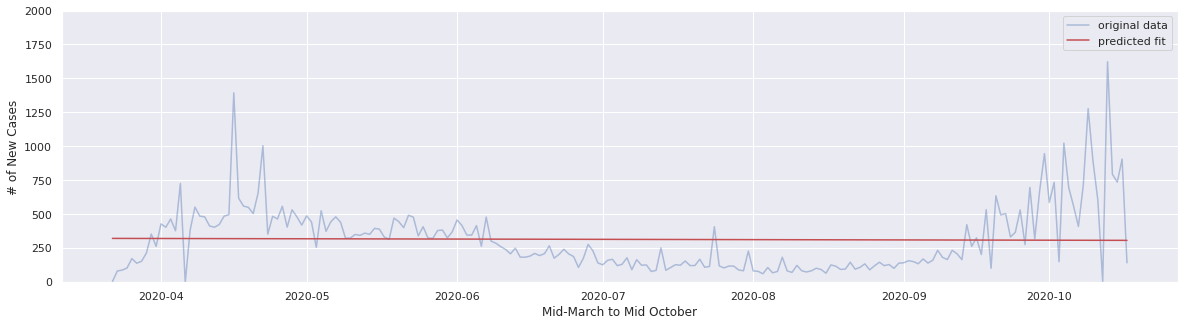

In [11]:
# Plot daily new cases 
plt.figure(figsize = (20,5))
plt.ylim(-5,2000)
plt.xlabel("Mid-March to Mid October")
plt.ylabel("# of New Cases")
plt.plot(yyzCases["Date"], yyzCases["Difference"], 'b-', label = 'original data', alpha = 0.4)
plt.plot(yyzCases["Date"], yyzCases["Prediction"], 'r-', label = 'predicted fit')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Difference'}, xlabel='Month'>

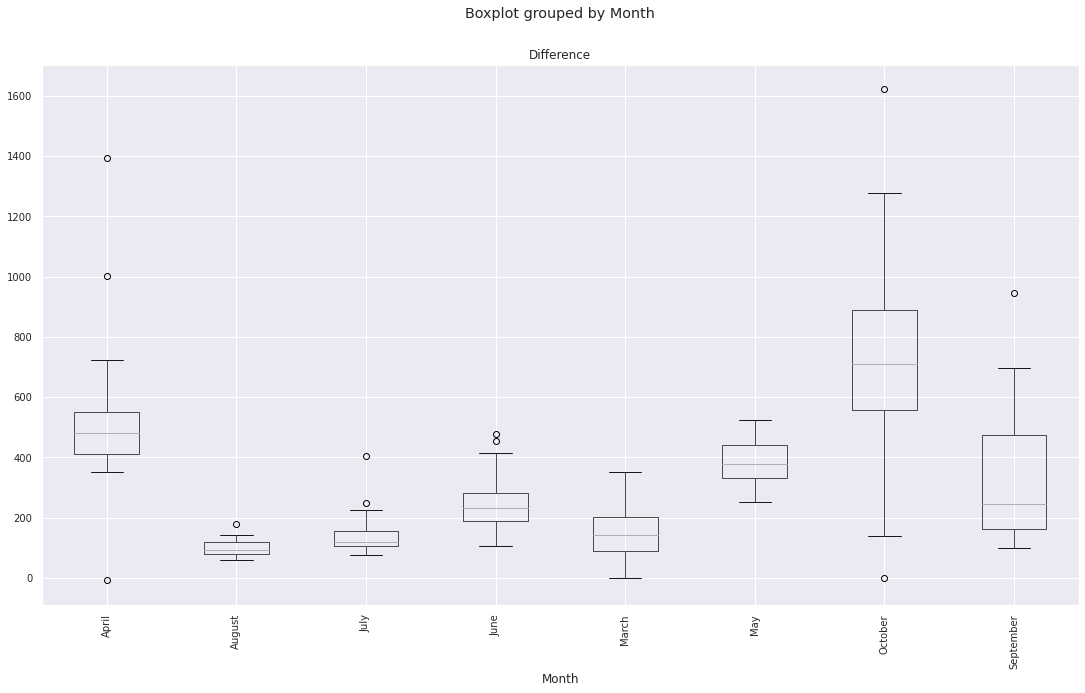

In [12]:
yyzCases["Month"] = yyzCases['Date'].dt.month_name()
yyzCases.boxplot(column = ['Difference'], by = 'Month', rot = 90, fontsize = 10, figsize = (18,10))

In [20]:
#yyzCases.to_csv('Covid-Data/yyz-modified.csv', index = False)
#yyzCases

# YUL

In [13]:
yulCases["Date"] = pd.to_datetime(yulCases["Date"])
#yulCases = yulCases.drop(columns = ["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.1.1", "Unnamed: 0.1.1.1"])
yulCases.loc[0,"Difference"] = 0
yulCases["timestamp"] = yulCases["Date"].apply(makeTimestamp)
fit = stats.linregress(yulCases["timestamp"], yulCases["Difference"])
yulCases["Prediction"] = yulCases["timestamp"] * fit.slope + fit.intercept
fit.slope, fit.intercept

(-1.2949151746233317e-05, 21071.562989334612)

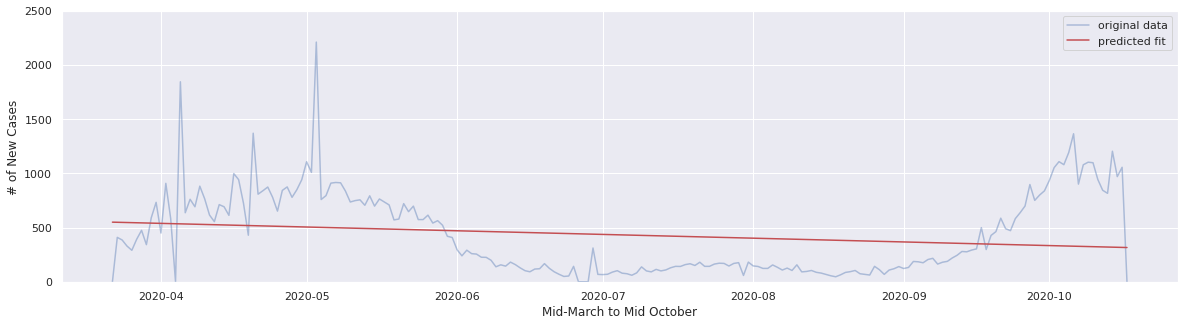

In [14]:
# Plot daily new cases 
plt.figure(figsize = (20,5))
plt.ylim(-5,2500)
plt.xlabel("Mid-March to Mid October")
plt.ylabel("# of New Cases")
plt.plot(yulCases["Date"], yulCases["Difference"], 'b-', label = 'original data', alpha = 0.4)
plt.plot(yulCases["Date"], yulCases["Prediction"], 'r-', label = 'predicted fit')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Difference'}, xlabel='Month'>

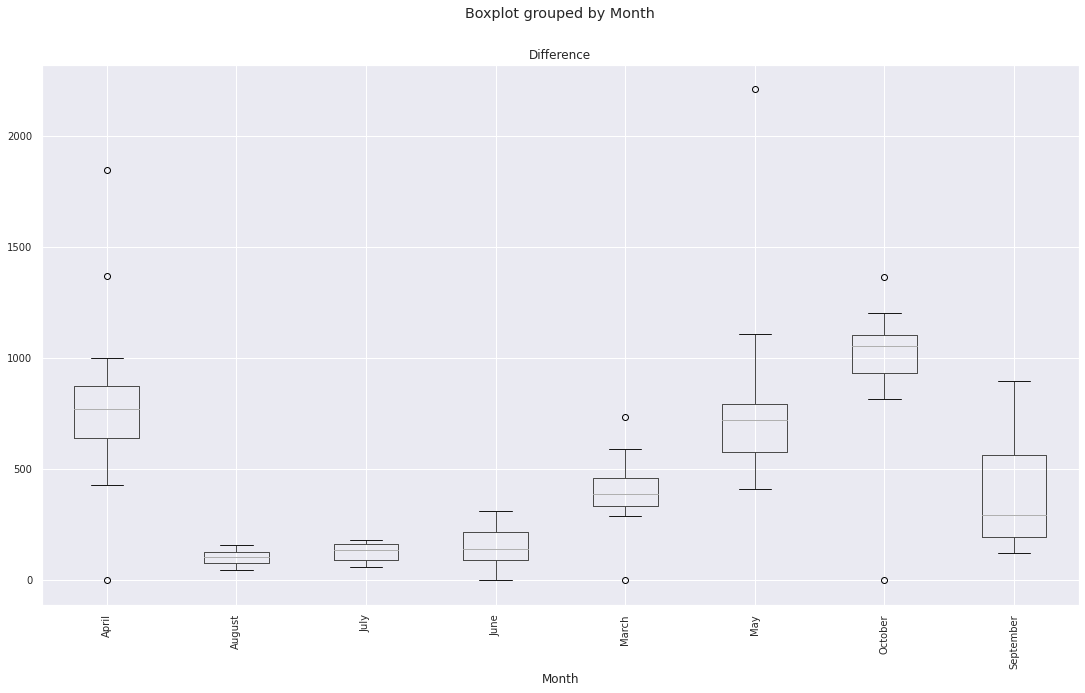

In [15]:
yulCases["Month"] = yulCases['Date'].dt.month_name()
yulCases.boxplot(column = ['Difference'], by = 'Month', rot = 90, fontsize = 10, figsize = (18,10))

In [25]:
yulCases.to_csv('Covid-Data/yul-modified.csv', index = False)